<a href="https://colab.research.google.com/github/quantumhome/DataAnalysisCaseStudy/blob/master/Boosting_Aisha(27_12).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

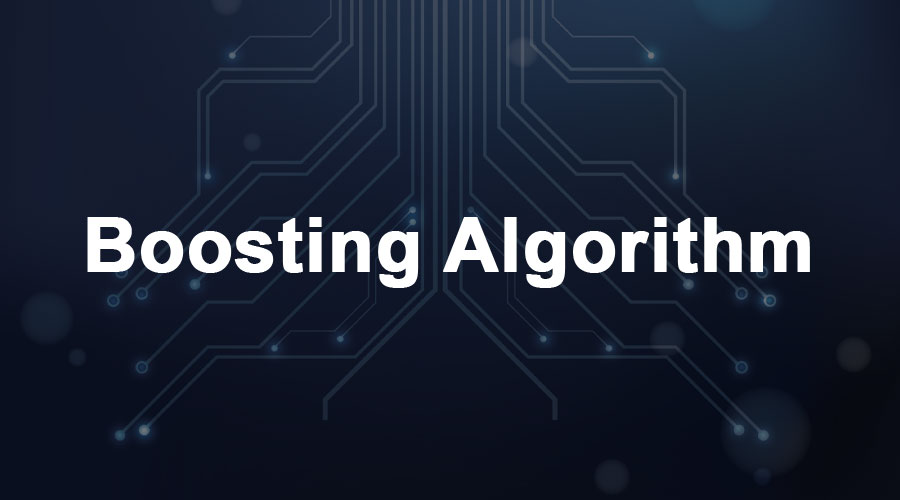

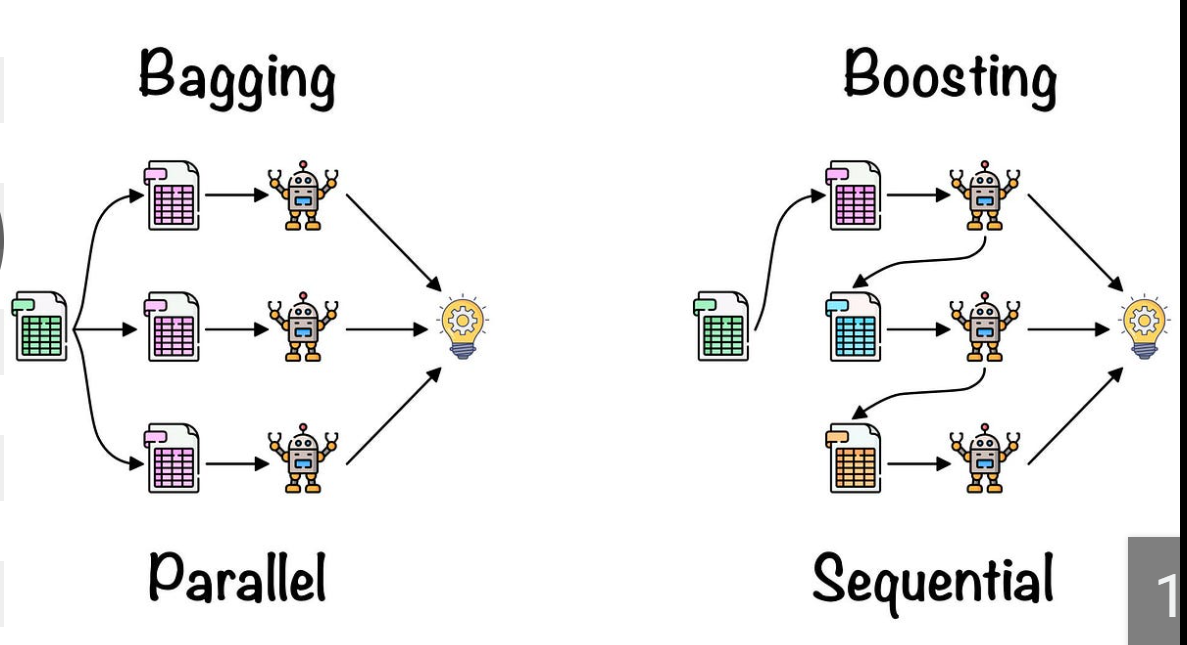

# 1. Introduction to Boosting

**Boosting is a machine learning technique that combines multiple weak learners to form a strong learner.**

Weak Learner: A model that performs slightly better than random guessing (e.g., a small decision tree).

Boosting builds these models sequentially, correcting the errors of the previous models to improve accuracy.

Think of it as a teacher (boosting algorithm) helping a group of students (weak learners) improve step by step.



# 2. AdaBoost (Adaptive Boosting)

**What is AdaBoost?**

AdaBoost is one of the earliest boosting algorithms.
It combines multiple weak learners, like decision stumps (a tree with just one split).

Each learner focuses on correcting the mistakes of the previous one by assigning more weight to misclassified points.

**A Decision Stump is a very simple type of decision tree. It is a tree with only one split (one level deep). This means it makes a decision based on just one feature and then stops.**

**How It Works:**

Start with a weak model and train it on the dataset.

Increase the weight of misclassified points so the next model focuses on these points.

Add all models together with weights based on their accuracy.

**Advantages:**

Simple and easy to implement.

Works well with clean datasets (less noise).

**When to Use:**

For smaller datasets and binary classification problems.

When you want a simple yet effective boosting method.

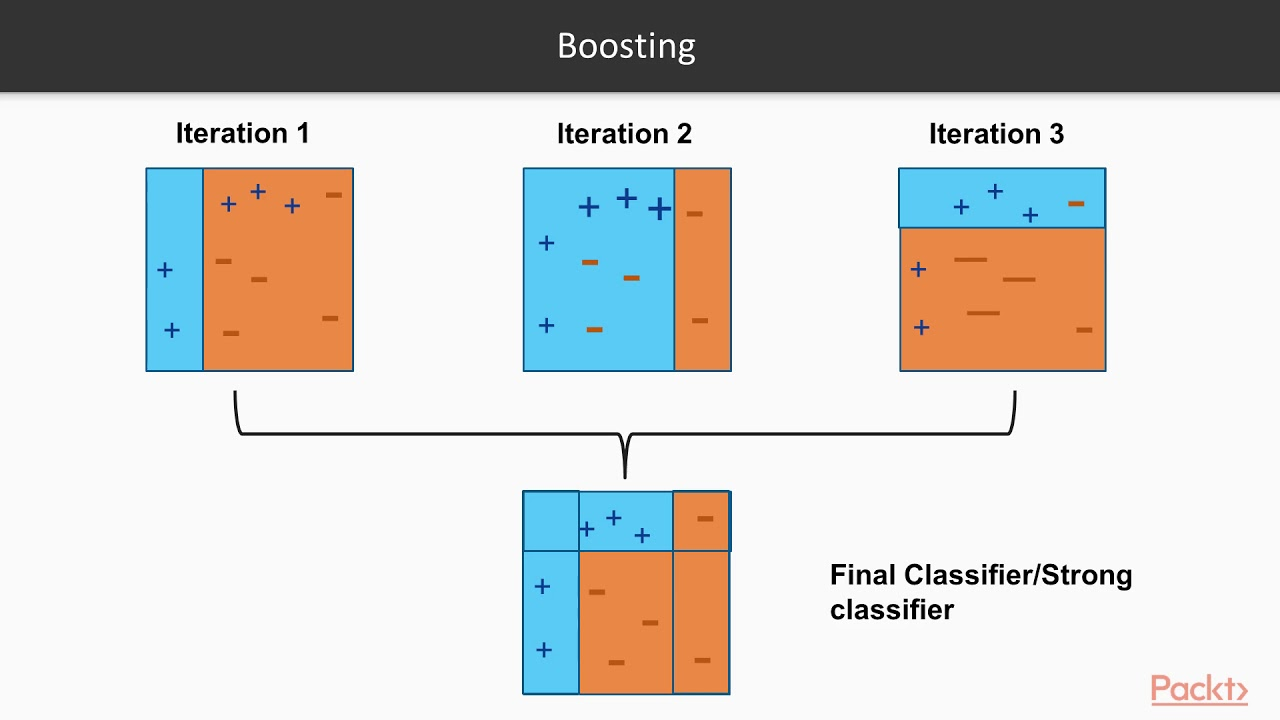

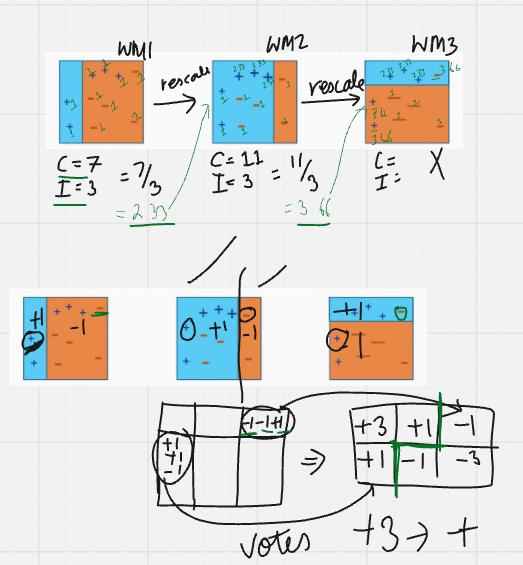

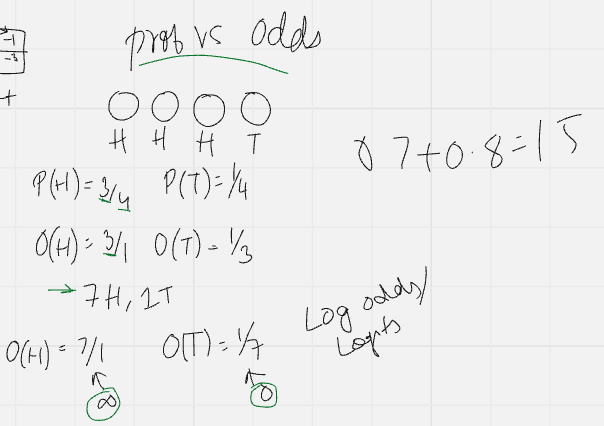

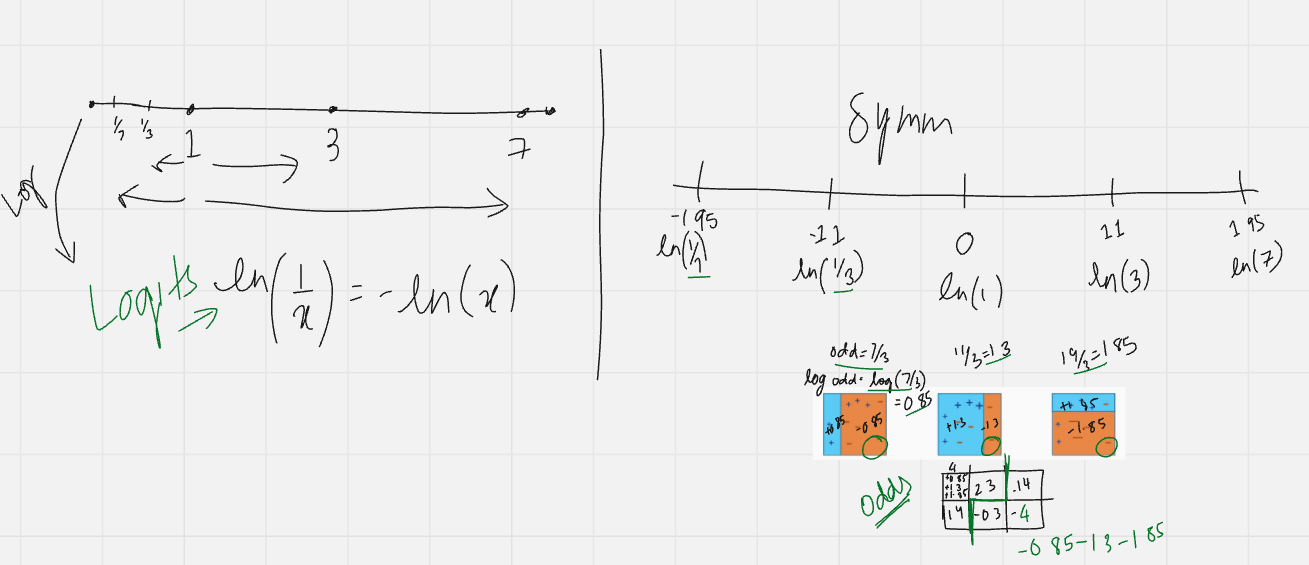

In [ ]:
#1. Rescale/Weightage
#2. Concept of Voting(along with prob vs odds)
#3. Log Odds
#4. Calc with Log Odds (Symmetry)

#Adaboost goes with weighted voting(Log odds)


#3. Gradient Boosting

**What is Gradient Boosting?**

Gradient Boosting is an improvement over AdaBoost.

It builds models sequentially, but instead of focusing on misclassified points, it minimizes a loss function (e.g., Mean Squared Error for regression).

Think of it as gradually climbing down a hill (minimizing error) step by step.

**How It Works:**

Start with an initial weak model (e.g., predicting the mean in regression).

Calculate the error (residual) between the predictions and actual values.

Train the next model to predict the residuals (errors).

Add these models together to make the final prediction.

**Advantages:**

Can handle noisy datasets better than AdaBoost.

Works well for regression and classification problems.

**When to Use:**

When you have more complex problems where AdaBoost struggles.

For tasks where minimizing the loss function is crucial.


#Gradient Boosting

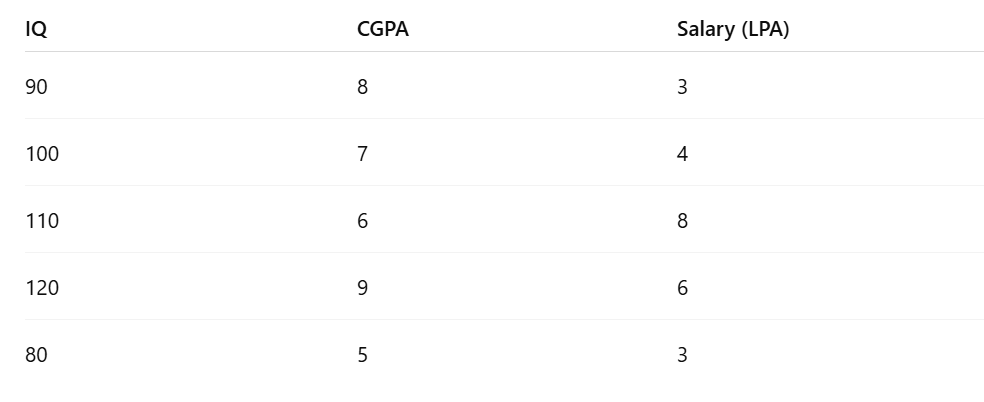

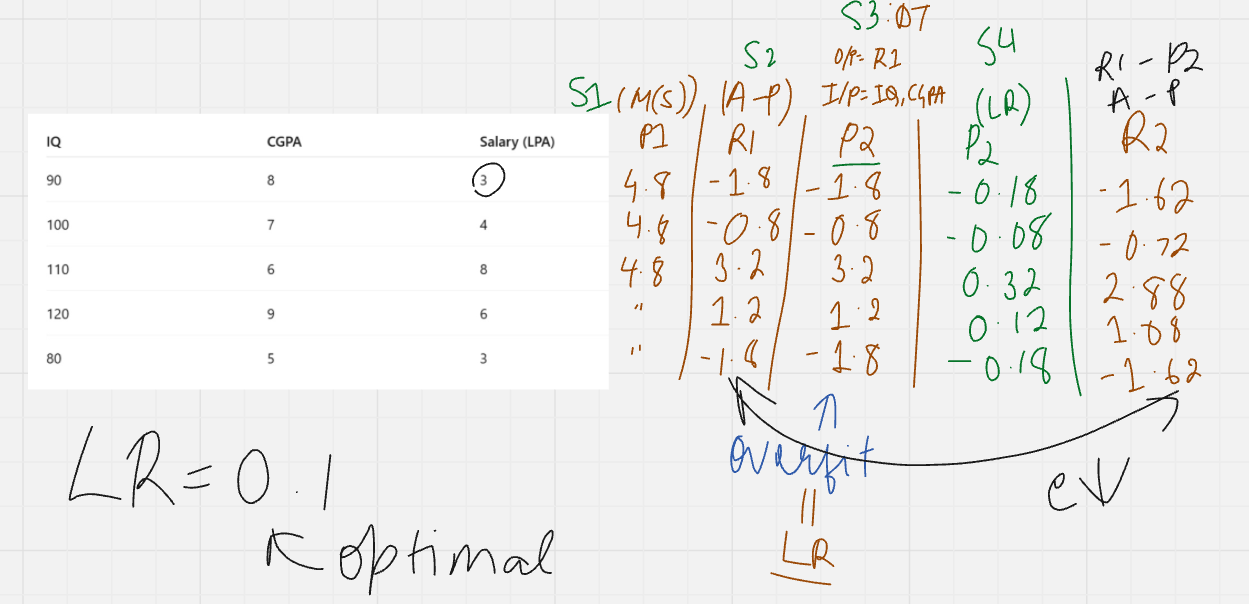

In [ ]:
#GB predicts a score that represents confidence for a class
#Predict score-> Measure Loss-> Learn correction-> Update scores

In [ ]:
#1. start with the best constant prediction(MEAN)
#2. residual error (Actual-predicted)(R1=(P1-Salary))
#3. predicted the Residual Errors(Overfitting -> Learning Rate)
#4. residual error (Actual-predicted) (R2)

In [ ]:
# Learning rate slows learning, so only 10%(0.1) of the error is corrected, and the remaining error becomes the new residual.
# When combining multiple models, LR should remain the same for all of them

In [ ]:
#Dataset Link:  https://drive.google.com/file/d/1CGnSSp0DHFUD7Et-140y1fkT4IR-M83t/view?usp=sharing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/census-income .csv")
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [ ]:
df.shape

(32561, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  annual_income   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [ ]:
#Handling the "?" in the dataset by converting it into null values
df.replace("?",np.nan,inplace=True)

In [ ]:
df.isnull().sum()

,0
age,0
workclass,1836
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,1843
relationship,0
race,0
sex,0


In [ ]:
df.isnull().sum().sum()

np.int64(4262)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum().sum()

np.int64(0)

In [ ]:
df.duplicated().sum()

np.int64(23)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'annual_income'],
      dtype='object')

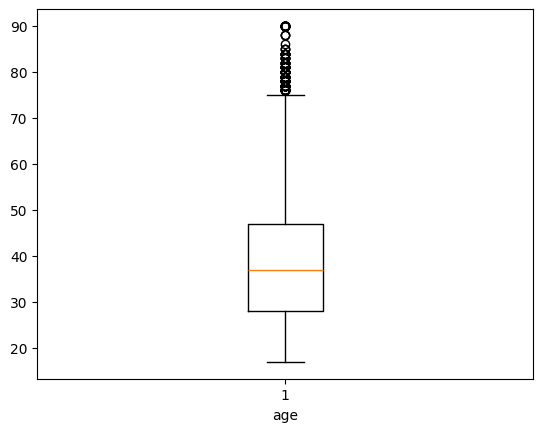

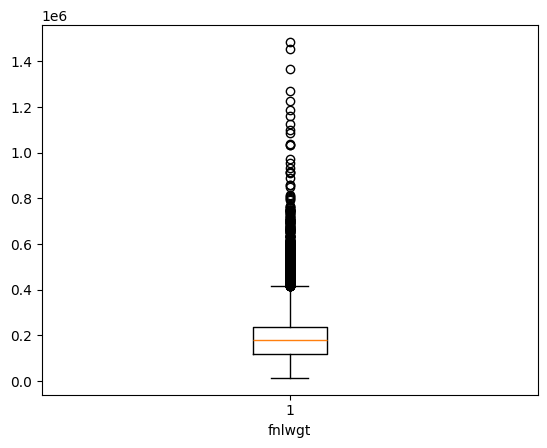

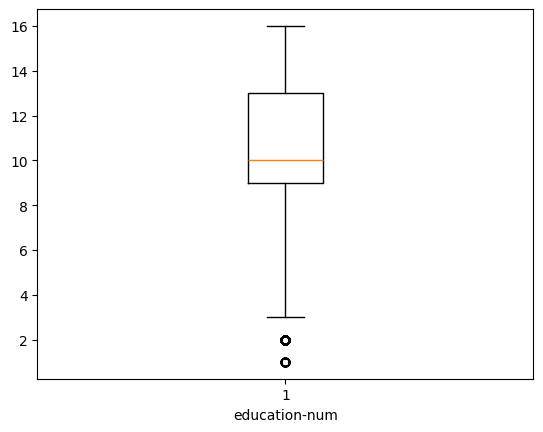

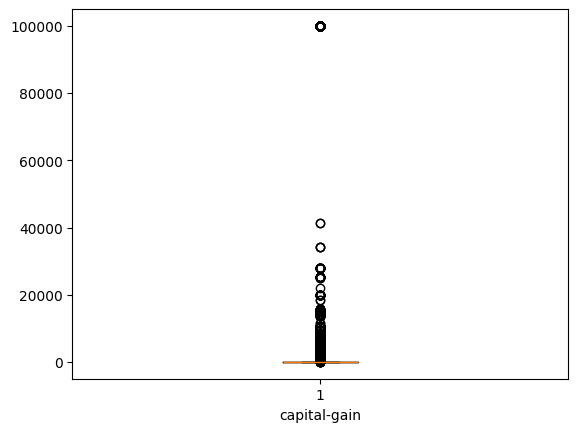

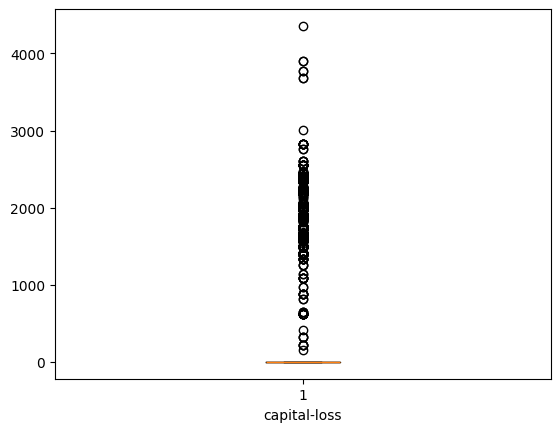

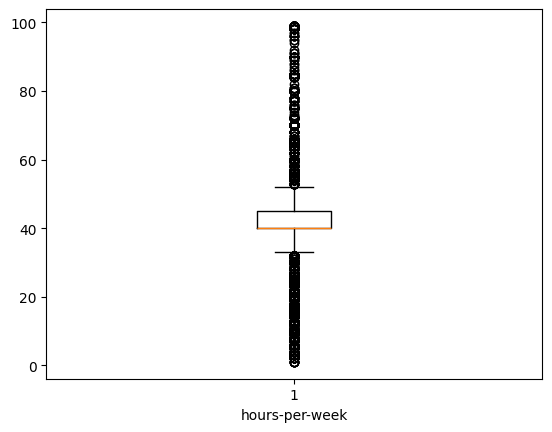

In [ ]:
for col in df.columns:
  if df[col].dtype != 'object':
    plt.boxplot(df[col])
    plt.xlabel(col)
    plt.show()

In [ ]:
#Decision Trees are not affected by Outliers so we can choose to keep or remove

In [ ]:
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()

for col in df.columns:
  if df[col].dtype == 'object':
    df[col]=LE.fit_transform(df[col])

In [ ]:
#.classes_ = gives the category along with name

In [ ]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,2,154374,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,2,151910,11,9,6,0,4,4,0,0,0,40,38,0
32559,22,2,201490,11,9,4,0,3,4,1,0,0,20,38,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30139 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             30139 non-null  int64
 1   workclass       30139 non-null  int64
 2   fnlwgt          30139 non-null  int64
 3   education       30139 non-null  int64
 4   education-num   30139 non-null  int64
 5   marital-status  30139 non-null  int64
 6   occupation      30139 non-null  int64
 7   relationship    30139 non-null  int64
 8   race            30139 non-null  int64
 9   sex             30139 non-null  int64
 10  capital-gain    30139 non-null  int64
 11  capital-loss    30139 non-null  int64
 12  hours-per-week  30139 non-null  int64
 13  native-country  30139 non-null  int64
 14  annual_income   30139 non-null  int64
dtypes: int64(15)
memory usage: 3.7 MB


In [ ]:
#-----MODEL BUILDING-----

In [ ]:
#Splitting the data into x and y

x=df.drop("annual_income",axis=1)
y=df['annual_income']

In [ ]:
x

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,7,12,2,12,5,4,0,0,0,38,38
32557,40,2,154374,11,9,2,6,0,4,1,0,0,40,38
32558,58,2,151910,11,9,6,0,4,4,0,0,0,40,38
32559,22,2,201490,11,9,4,0,3,4,1,0,0,20,38


In [ ]:
y

,annual_income
0,0
1,0
2,0
3,0
4,0
...,...
32556,0
32557,1
32558,0
32559,0


In [ ]:
#Splitting the data into training and testing sets

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=42)

In [ ]:
x_train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
12776,39,2,181943,9,13,4,3,1,4,0,0,0,35,38
19947,34,2,269723,11,9,0,3,4,4,0,2977,0,50,38
3208,47,2,297884,0,6,6,6,1,4,1,0,0,40,38
28240,48,2,147860,11,9,2,5,5,2,0,0,0,40,38
8249,44,0,344060,14,15,2,9,0,4,1,0,0,40,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32194,42,5,455553,11,9,4,0,4,2,0,0,0,40,38
5877,37,2,323155,3,2,2,4,0,4,1,0,0,85,25
935,37,2,176900,11,9,2,2,0,4,1,0,0,99,38
17063,49,2,124672,11,9,2,2,0,4,1,0,0,40,38


In [ ]:
y_train

,annual_income
12776,0
19947,0
3208,0
28240,0
8249,1
...,...
32194,0
5877,0
935,1
17063,1


In [ ]:
x_test

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
9395,31,2,210008,11,9,4,11,3,4,0,0,0,40,38
3393,33,2,161745,8,11,2,4,0,4,1,0,0,45,38
17020,22,2,378104,11,9,4,5,3,4,1,0,0,40,38
6191,38,2,51838,11,9,2,9,5,4,0,0,0,40,38
465,37,2,126708,11,9,2,0,5,4,0,0,0,60,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15937,34,5,287908,11,9,4,7,3,2,1,0,0,42,38
29346,48,2,498328,0,6,2,13,0,2,1,0,0,40,38
4225,27,3,233724,11,9,5,0,1,4,1,0,0,38,38
28066,46,2,216414,8,11,3,2,4,4,1,0,0,40,38


In [ ]:
y_test

,annual_income
9395,0
3393,0
17020,0
6191,0
465,0
...,...
15937,0
29346,0
4225,0
28066,0


In [ ]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model.fit(x_train,y_train)
y_pred=log_model.predict(x_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import *
score=accuracy_score(y_test,y_pred)
print(f"Accuracy Score(Logistic Regression): {score}")

Accuracy Score(Logistic Regression): 0.7806901128069011


In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
DT_model=DecisionTreeClassifier()
DT_model.fit(x_train,y_train)
y_pred=DT_model.predict(x_test)

In [ ]:
from sklearn.metrics import *
score=accuracy_score(y_test,y_pred)
print(f"Accuracy Score(DT): {score}")

Accuracy Score(DT): 0.8087812430878124


In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
RF_model=RandomForestClassifier()
RF_model.fit(x_train,y_train)
y_pred=RF_model.predict(x_test)

In [ ]:
from sklearn.metrics import *
score=accuracy_score(y_test,y_pred)
print(f"Accuracy Score(RF): {score}")

Accuracy Score(RF): 0.860650298606503


#AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_model=AdaBoostClassifier()

ada_model.fit(x_train,y_train)

y_pred=ada_model.predict(x_test)

In [ ]:
from sklearn.metrics import *
acc=accuracy_score(y_test,y_pred)
print(acc)

0.8462729484627295


#Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model=GradientBoostingClassifier()

gb_model.fit(x_train,y_train)

y_pred=gb_model.predict(x_test)

In [ ]:
from sklearn.metrics import *
acc=accuracy_score(y_test,y_pred)
print(acc)

0.8619774386197744


#4. XGBoost (Extreme Gradient Boosting)

**What is XGBoost?**

XGBoost is an advanced version of Gradient Boosting.

It is optimized for speed and performance, making it one of the most popular algorithms in machine learning competitions (e.g., Kaggle).

**How It Works:**

Similar to Gradient Boosting, but includes advanced techniques like:

Regularization: Reduces overfitting by penalizing complex models.

Parallel Processing: Trains models faster.

Tree Pruning: Avoids overgrown trees for better generalization.

**Advantages:**

Very fast and efficient, even with large datasets.

Handles missing data automatically.

Offers high accuracy in most scenarios.

**When to Use:**

For large datasets with many features.

When speed and performance are critical.

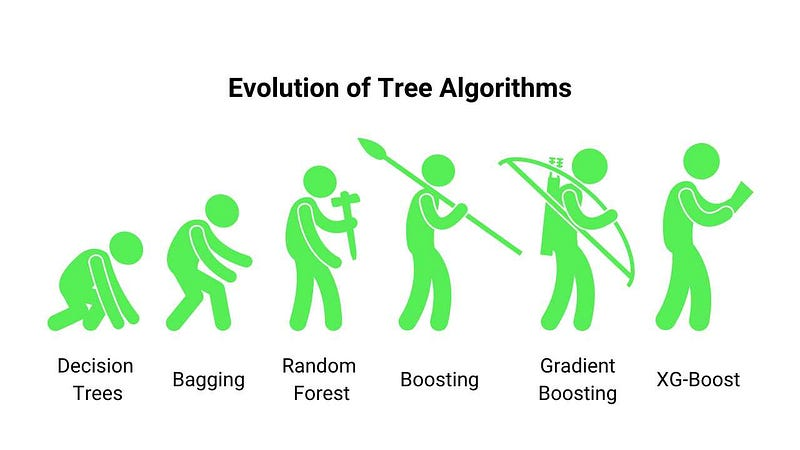

In [ ]:
#(Tianqui Chen) XGBOOST focuses on:
#1. performance,
#2. speed(larger and different datasets)
#3. flexibility(compatible with different languages, OS and libraries)

In [ ]:
#Regularization: way to stop model from becoming too complex and memorizing data

In [ ]:
#XGBoost uses: 1. Regularization: adding penalties to reduce overfitting
#2. Parallelization: evaluates possible splits in parallel across features and then picks the best
#3. Tree Pruning: (Pre-pruning: Gradient Boosting), Post-Pruning, saves pre processing time

In [ ]:
from xgboost import XGBClassifier

xg_model=XGBClassifier()

xg_model.fit(x_train,y_train)

y_pred=xg_model.predict(x_test)

In [ ]:
from sklearn.metrics import *
acc=accuracy_score(y_test,y_pred)
print(acc)

0.8651846936518469


#5. Comparison of Algorithms

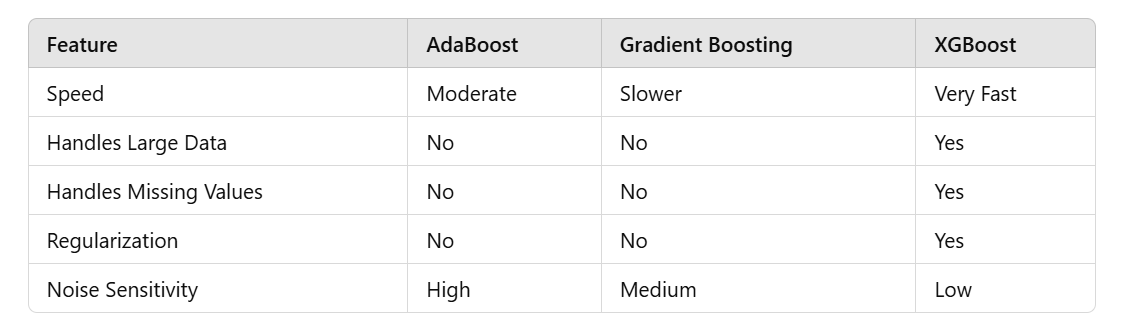


#6. Advantages of Boosting in General

Improves accuracy by combining multiple models.

Works well with structured/tabular data.

Reduces bias and variance.

#7. When to Use Boosting Algorithms

When simpler models (like Decision Trees or Linear Regression) don’t perform well.

For problems requiring high accuracy.

For competitions and real-world applications where performance matters.

#8. Limitations

Can overfit if not tuned properly.

Computationally expensive (except XGBoost).

May struggle with noisy datasets (especially AdaBoost).

#9. Real-Life Applications

Fraud detection (e.g., credit card fraud).

Customer segmentation.

Predicting loan defaults.

Recommendation systems.

In [ ]:
#Customer Churn Dataset: https://drive.google.com/file/d/1nsnQPNTWbxNeXBXczDPIAMqvEyW_NHLR/view?usp=drive_link

In [ ]:
# XGB having lowest accuracy does not mean its worse, it often means its being more careful